# Lab | Unsupervised learning intro (GNOD - part 4)


In [1]:
from bs4 import BeautifulSoup
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import requests
import pandas as pd
from pandas import json_normalize
import time
import random
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
#Import CSV Music Features

In [3]:
spotify_data = pd.read_csv('spotify_data.csv')


In [4]:
spotify_data

,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id
0,Take Me To Church,Hozier,7dS5EaCoMnN7DzlpT6aRn2,0.566,0.664,4,-5.303,0,0.0464,0.6340,0.000000,0.1160,0.437,128.945,241688,4,7dS5EaCoMnN7DzlpT6aRn2
1,Cooler Than Me - Single Mix,Mike Posner,2V4bv1fNWfTcyRJKmej6Sj,0.768,0.820,7,-4.630,0,0.0474,0.1790,0.000000,0.6890,0.625,129.965,213293,4,2V4bv1fNWfTcyRJKmej6Sj
2,See You Again (feat. Kali Uchis),"Tyler, The Creator",7KA4W4McWYRpgf0fWsJZWB,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.1090,0.620,78.558,180387,4,7KA4W4McWYRpgf0fWsJZWB
3,Pompeii,Bastille,3gbBpTdY8lnQwqxNCcf795,0.679,0.715,9,-6.383,1,0.0407,0.0755,0.000000,0.2710,0.571,127.435,214148,4,3gbBpTdY8lnQwqxNCcf795
4,Hips Don't Lie (feat. Wyclef Jean),Shakira,3ZFTkvIE7kyPt6Nu3PEa7V,0.778,0.824,10,-5.892,0,0.0707,0.2840,0.000000,0.4050,0.758,100.024,218093,4,3ZFTkvIE7kyPt6Nu3PEa7V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13312,Jambalaya (On The Bayou),John Fogerty,6389cBCT7TWS2Nx0KVsjrk,0.742,0.756,2,-10.121,1,0.0262,0.6240,0.000130,0.0800,0.977,98.568,197760,4,6389cBCT7TWS2Nx0KVsjrk
13313,Hearts Of Stone,John Fogerty,2uJVtJd1w2N8vg6pJmaNdN,0.412,0.677,6,-10.763,1,0.0376,0.5370,0.006640,0.1210,0.853,205.922,134000,4,2uJVtJd1w2N8vg6pJmaNdN
13314,Rock and Roll Girls,John Fogerty,5DeuAlTIDflXOomztXYM5D,0.794,0.730,7,-6.067,1,0.0332,0.0538,0.000832,0.0826,0.767,128.999,206640,4,5DeuAlTIDflXOomztXYM5D
13315,Rockin' All Over The World,John Fogerty,2X0fwXZpoAbVZdyFVjJOUm,0.539,0.909,2,-6.546,1,0.0423,0.5180,0.000394,0.5580,0.964,130.821,173000,4,2X0fwXZpoAbVZdyFVjJOUm


In [5]:
spotify_data.columns


Index(['title', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'id'],
      dtype='object')

In [7]:
spotify_data= spotify_data[['title', 'artist', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'uri', 'id']]
spotify_data

,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,uri,id
0,Take Me To Church,Hozier,0.566,0.664,4,-5.303,0,0.0464,0.6340,0.000000,0.1160,0.437,128.945,241688,4,7dS5EaCoMnN7DzlpT6aRn2,7dS5EaCoMnN7DzlpT6aRn2
1,Cooler Than Me - Single Mix,Mike Posner,0.768,0.820,7,-4.630,0,0.0474,0.1790,0.000000,0.6890,0.625,129.965,213293,4,2V4bv1fNWfTcyRJKmej6Sj,2V4bv1fNWfTcyRJKmej6Sj
2,See You Again (feat. Kali Uchis),"Tyler, The Creator",0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.1090,0.620,78.558,180387,4,7KA4W4McWYRpgf0fWsJZWB,7KA4W4McWYRpgf0fWsJZWB
3,Pompeii,Bastille,0.679,0.715,9,-6.383,1,0.0407,0.0755,0.000000,0.2710,0.571,127.435,214148,4,3gbBpTdY8lnQwqxNCcf795,3gbBpTdY8lnQwqxNCcf795
4,Hips Don't Lie (feat. Wyclef Jean),Shakira,0.778,0.824,10,-5.892,0,0.0707,0.2840,0.000000,0.4050,0.758,100.024,218093,4,3ZFTkvIE7kyPt6Nu3PEa7V,3ZFTkvIE7kyPt6Nu3PEa7V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13312,Jambalaya (On The Bayou),John Fogerty,0.742,0.756,2,-10.121,1,0.0262,0.6240,0.000130,0.0800,0.977,98.568,197760,4,6389cBCT7TWS2Nx0KVsjrk,6389cBCT7TWS2Nx0KVsjrk
13313,Hearts Of Stone,John Fogerty,0.412,0.677,6,-10.763,1,0.0376,0.5370,0.006640,0.1210,0.853,205.922,134000,4,2uJVtJd1w2N8vg6pJmaNdN,2uJVtJd1w2N8vg6pJmaNdN
13314,Rock and Roll Girls,John Fogerty,0.794,0.730,7,-6.067,1,0.0332,0.0538,0.000832,0.0826,0.767,128.999,206640,4,5DeuAlTIDflXOomztXYM5D,5DeuAlTIDflXOomztXYM5D
13315,Rockin' All Over The World,John Fogerty,0.539,0.909,2,-6.546,1,0.0423,0.5180,0.000394,0.5580,0.964,130.821,173000,4,2X0fwXZpoAbVZdyFVjJOUm,2X0fwXZpoAbVZdyFVjJOUm


In [8]:
X= spotify_data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]

In [9]:
#Scale

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
#decide number of clusters

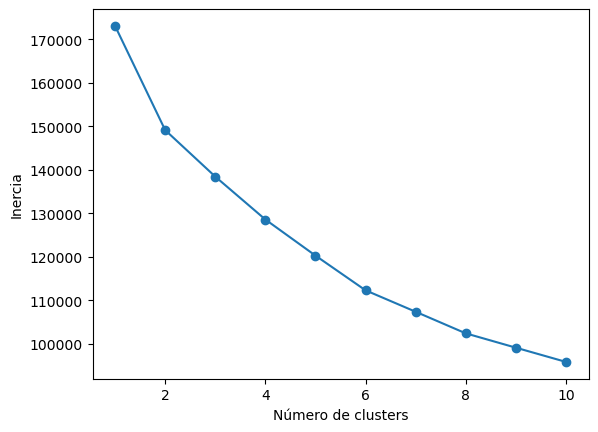

In [12]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()


In [13]:
#build the model

In [14]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X_scaled)


KMeans()

In [15]:
clusters = kmeans.predict(X_scaled)


In [16]:
pd.Series(clusters).value_counts().sort_index()

0    2107
1     843
2     624
3    3441
4     472
5    2940
6    2090
7     800
dtype: int64

In [17]:
#add cluster number to the songs

In [18]:
spotify_data['cluster'] = kmeans.predict(X_scaled)

# Muestra el dataframe con la nueva columna 'cluster'
print(spotify_data.head())


                                title              artist  danceability  \
0                   Take Me To Church              Hozier         0.566   
1         Cooler Than Me - Single Mix         Mike Posner         0.768   
2    See You Again (feat. Kali Uchis)  Tyler, The Creator         0.558   
3                             Pompeii            Bastille         0.679   
4  Hips Don't Lie (feat. Wyclef Jean)             Shakira         0.778   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.664    4    -5.303     0       0.0464        0.6340          0.000000   
1   0.820    7    -4.630     0       0.0474        0.1790          0.000000   
2   0.559    6    -9.222     1       0.0959        0.3710          0.000007   
3   0.715    9    -6.383     1       0.0407        0.0755          0.000000   
4   0.824   10    -5.892     0       0.0707        0.2840          0.000000   

   liveness  valence    tempo  duration_ms  time_signature  \
0     0.116 

/var/folders/0r/l856hq9x61zf5p8g8vxjs_dh0000gn/T/ipykernel_2466/2564290850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data['cluster'] = kmeans.predict(X_scaled)


In [19]:
spotify_data

,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,uri,id,cluster
0,Take Me To Church,Hozier,0.566,0.664,4,-5.303,0,0.0464,0.6340,0.000000,0.1160,0.437,128.945,241688,4,7dS5EaCoMnN7DzlpT6aRn2,7dS5EaCoMnN7DzlpT6aRn2,5
1,Cooler Than Me - Single Mix,Mike Posner,0.768,0.820,7,-4.630,0,0.0474,0.1790,0.000000,0.6890,0.625,129.965,213293,4,2V4bv1fNWfTcyRJKmej6Sj,2V4bv1fNWfTcyRJKmej6Sj,7
2,See You Again (feat. Kali Uchis),"Tyler, The Creator",0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.1090,0.620,78.558,180387,4,7KA4W4McWYRpgf0fWsJZWB,7KA4W4McWYRpgf0fWsJZWB,3
3,Pompeii,Bastille,0.679,0.715,9,-6.383,1,0.0407,0.0755,0.000000,0.2710,0.571,127.435,214148,4,3gbBpTdY8lnQwqxNCcf795,3gbBpTdY8lnQwqxNCcf795,3
4,Hips Don't Lie (feat. Wyclef Jean),Shakira,0.778,0.824,10,-5.892,0,0.0707,0.2840,0.000000,0.4050,0.758,100.024,218093,4,3ZFTkvIE7kyPt6Nu3PEa7V,3ZFTkvIE7kyPt6Nu3PEa7V,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13312,Jambalaya (On The Bayou),John Fogerty,0.742,0.756,2,-10.121,1,0.0262,0.6240,0.000130,0.0800,0.977,98.568,197760,4,6389cBCT7TWS2Nx0KVsjrk,6389cBCT7TWS2Nx0KVsjrk,3
13313,Hearts Of Stone,John Fogerty,0.412,0.677,6,-10.763,1,0.0376,0.5370,0.006640,0.1210,0.853,205.922,134000,4,2uJVtJd1w2N8vg6pJmaNdN,2uJVtJd1w2N8vg6pJmaNdN,3
13314,Rock and Roll Girls,John Fogerty,0.794,0.730,7,-6.067,1,0.0332,0.0538,0.000832,0.0826,0.767,128.999,206640,4,5DeuAlTIDflXOomztXYM5D,5DeuAlTIDflXOomztXYM5D,3
13315,Rockin' All Over The World,John Fogerty,0.539,0.909,2,-6.546,1,0.0423,0.5180,0.000394,0.5580,0.964,130.821,173000,4,2X0fwXZpoAbVZdyFVjJOUm,2X0fwXZpoAbVZdyFVjJOUm,7


In [20]:
spotify_data.to_csv('spotify_data.csv', index=False)
    

In [21]:
#saving the model for the last lab

In [22]:
import pickle

with open('modelo_kmeans.pkl', 'wb') as file:
    pickle.dump(kmeans, file)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

